# Import Dependency

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Classification

## Data Preparation

In [2]:
df_cla = pd.read_csv("fifa.csv", index_col=0)

In [3]:
label_encoder = LabelEncoder()
df_cla['Position'] = label_encoder.fit_transform(df_cla['Position'])

df_cla.head()

Age  Nationality  Overall  Potential  Club      Value    Wage  Special  \
0  26.0          126     88.0       89.0   485  107500000  250000   2341.0   
1  26.0           59     87.0       88.0   287   93000000  140000   2314.0   
2  34.0          159     88.0       88.0    81   44500000  135000   2307.0   
3  30.0           13     91.0       91.0   484  125500000  350000   2304.0   
4  29.0            6     84.0       84.0   661   37000000   45000   2292.0   

   Preferred Foot  International Reputation  ...  GKDiving  GKHandling  \
0               1                       3.0  ...      12.0        14.0   
1               1                       4.0  ...      13.0         8.0   
2               1                       5.0  ...      27.0        25.0   
3               1                       4.0  ...      15.0        13.0   
4               0                       2.0  ...       8.0        14.0   

   GKKicking  GKPositioning GKReflexes  Best Overall Rating  Release Clause  \
0       15.0            8.0       14.0                 88.0       206900000   
1       15.0           11.0        9.0                 87.0       160400000   
2       31.0           33.0       37.0                 88.0        91200000   
3        5.0           10.0       13.0                 91.0       232200000   
4       13.0           13.0       14.0                 84.0        77700000   

   DefensiveAwareness  Attacking Work Rate  Defensive Work Rate  
0                72.0                    0                    0  
1                74.0                    0                    2  
2                42.0                    0                    2  
3                68.0                    0                    0  
4                80.0                    0                    0  

[5 rows x 56 columns]

In [4]:
df_cla = df_cla.drop('Joined', axis=1)

In [5]:
# Normalisasi data
temp = df_cla.drop(['Position'], axis=1)
df_cla[temp.columns] = MinMaxScaler().fit_transform(temp)

df_cla

Age  Nationality   Overall  Potential      Club     Value  \
0      0.263158     0.763636  0.891304   0.875000  0.601737  0.554124   
1      0.263158     0.357576  0.869565   0.854167  0.356079  0.479381   
2      0.473684     0.963636  0.891304   0.854167  0.100496  0.229381   
3      0.368421     0.078788  0.956522   0.916667  0.600496  0.646907   
4      0.342105     0.036364  0.804348   0.770833  0.820099  0.190722   
...         ...          ...       ...        ...       ...       ...   
16703  0.078947     0.357576  0.108696   0.395833  0.354839  0.000876   
16704  0.105263     0.357576  0.239130   0.458333  0.346154  0.001933   
16706  0.105263     0.781818  0.130435   0.333333  0.349876  0.000928   
16707  0.078947     0.181818  0.000000   0.270833  0.826303  0.000515   
16708  0.052632     0.448485  0.000000   0.416667  0.037221  0.000567   

           Wage   Special  Preferred Foot  International Reputation  ...  \
0      0.713877  1.000000             1.0                      0.50  ...   
1      0.399142  0.982987             1.0                      0.75  ...   
2      0.384835  0.978576             1.0                      1.00  ...   
3      1.000000  0.976686             1.0                      0.75  ...   
4      0.127325  0.969124             0.0                      0.25  ...   
...         ...       ...             ...                       ...  ...   
16703  0.000429  0.030876             1.0                      0.00  ...   
16704  0.001288  0.030246             1.0                      0.00  ...   
16706  0.000143  0.015123             1.0                      0.00  ...   
16707  0.000572  0.010082             1.0                      0.00  ...   
16708  0.000000  0.000000             1.0                      0.00  ...   

       GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
0      0.122222    0.142857   0.152174       0.076923    0.146067   
1      0.133333    0.076923   0.152174       0.109890    0.089888   
2      0.288889    0.263736   0.326087       0.351648    0.404494   
3      0.155556    0.131868   0.043478       0.098901    0.134831   
4      0.077778    0.142857   0.130435       0.131868    0.146067   
...         ...         ...        ...            ...         ...   
16703  0.577778    0.483516   0.500000       0.560440    0.629213   
16704  0.644444    0.648352   0.597826       0.593407    0.674157   
16706  0.622222    0.560440   0.565217       0.516484    0.640449   
16707  0.533333    0.516484   0.478261       0.406593    0.573034   
16708  0.533333    0.439560   0.413043       0.483516    0.539326   

       Best Overall Rating  Release Clause  DefensiveAwareness  \
0                 0.891304        0.553949            0.766667   
1                 0.869565        0.429451            0.788889   
2                 0.891304        0.244177            0.433333   
3                 0.956522        0.621687            0.722222   
4                 0.804348        0.208032            0.855556   
...                    ...             ...                 ...   
16703             0.108696        0.000967            0.033333   
16704             0.239130        0.001756            0.022222   
16706             0.130435        0.000747            0.022222   
16707             0.000000        0.000597            0.200000   
16708             0.000000        0.000693            0.044444   

       Attacking Work Rate  Defensive Work Rate  
0                      0.0                  0.0  
1                      0.0                  1.0  
2                      0.0                  1.0  
3                      0.0                  0.0  
4                      0.0                  0.0  
...                    ...                  ...  
16703                  1.0                  1.0  
16704                  1.0                  1.0  
16706                  1.0                  1.0  
16707                  1.0                  1.0  
16708                  1.0                  1.0  


## Feature Selection

Text(0.5, 1.0, 'Matriks Korelasi Pearson')

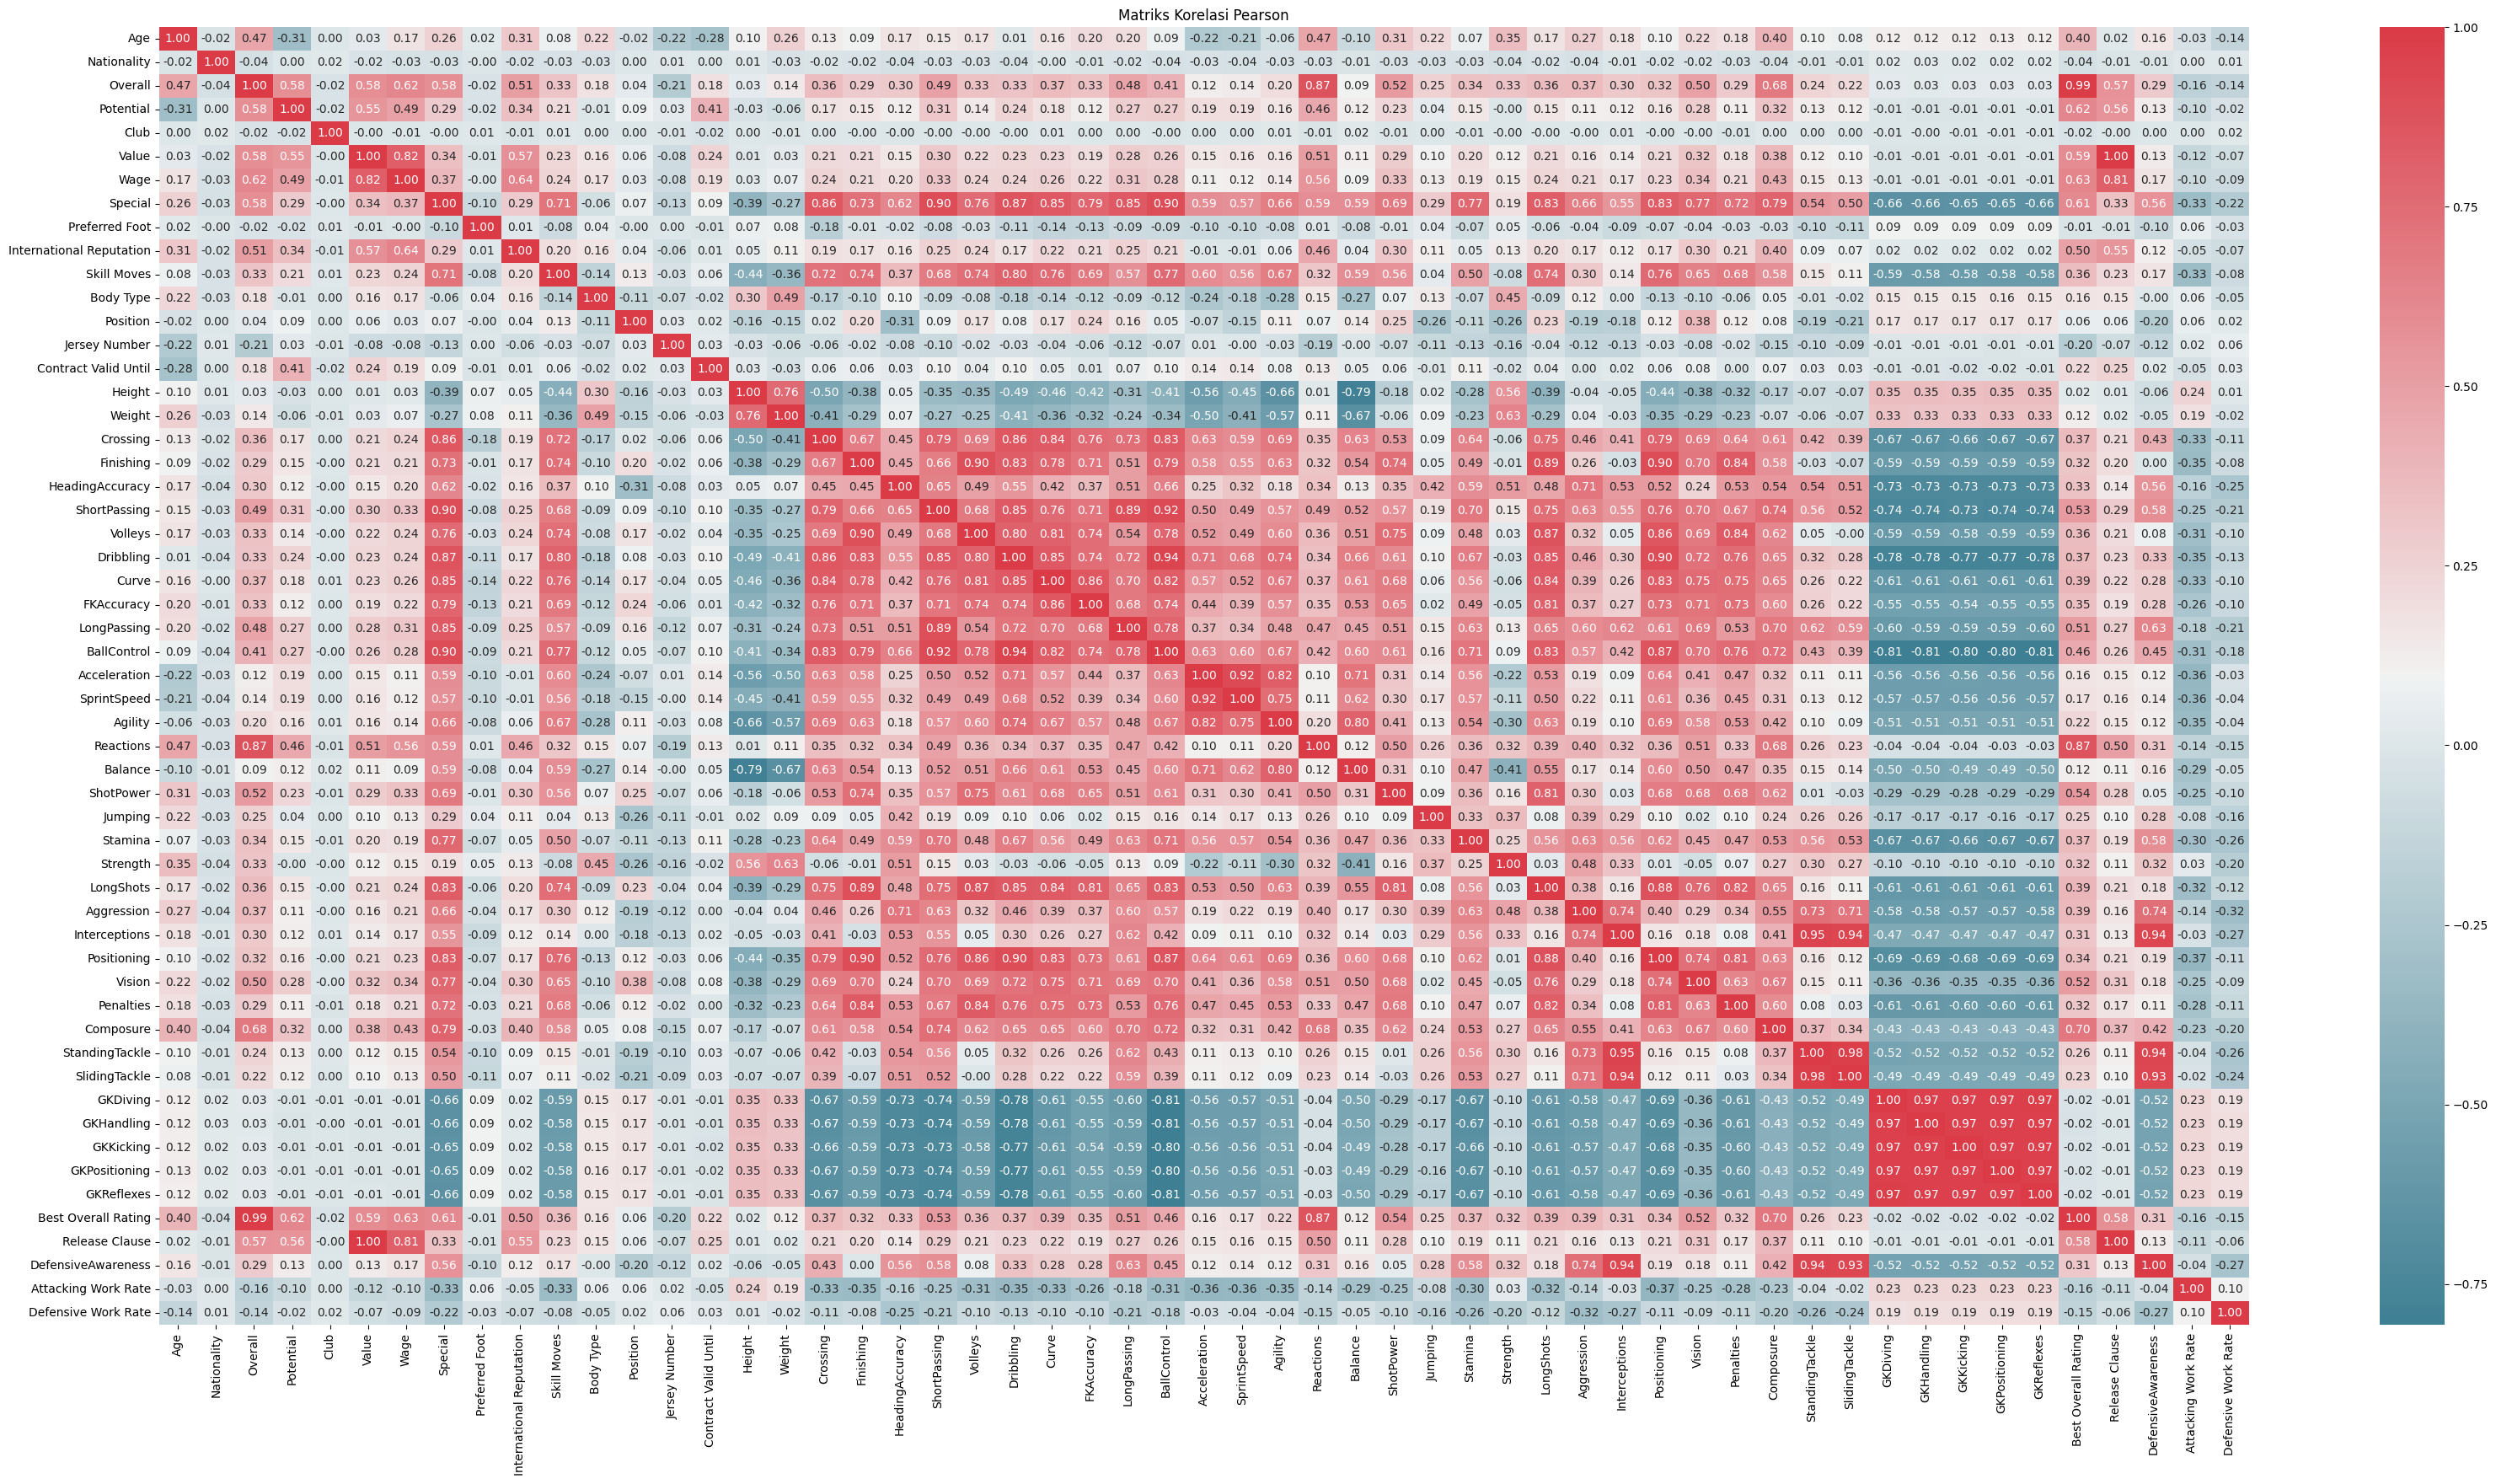

In [6]:
plt.figure(figsize=(40,20))

sns.heatmap(df_cla.corr(), vmin=None, vmax=None,
                cmap=sns.diverging_palette(220, 10, as_cmap=True), center=None,
                robust=False, annot=True,
                fmt='.2f', annot_kws=None,
                linewidths=0, linecolor='white',
                cbar_kws=None, cbar_ax=None, square=False,
                xticklabels='auto', yticklabels='auto',
                mask=None, ax=None)

plt.title("Matriks Korelasi Pearson")

In [7]:
X = df_cla.drop('Position', axis=1)
y = df_cla['Position']

In [8]:
X = X.drop(['Best Overall Rating', 'DefensiveAwareness', 'StandingTackle', 'Release Clause', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'BallControl', 'Interceptions'], axis=1)

In [9]:
max_param = ['Age', 'Potential', 'Special', 'Preferred Foot', 'Skill Moves', 'Body Type',
 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'Acceleration',
 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Positioning', 'Vision',
 'Penalties', 'Composure', 'SlidingTackle', 'GKReflexes',
 'Attacking Work Rate', 'Defensive Work Rate']

In [10]:
X = X[max_param]

## Training

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2023)

In [12]:
# Build the Classification Model
model = keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
325/325 [==============================] - 2s 3ms/step - loss: 0.5873 - accuracy: 0.7508 - val_loss: 0.4140 - val_accuracy: 0.8293
Epoch 2/50
325/325 [==============================] - 1s 3ms/step - loss: 0.3889 - accuracy: 0.8371 - val_loss: 0.3494 - val_accuracy: 0.8536
Epoch 3/50
325/325 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8549 - val_loss: 0.3398 - val_accuracy: 0.8640
Epoch 4/50
325/325 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8625 - val_loss: 0.3221 - val_accuracy: 0.8596
Epoch 5/50
325/325 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8702 - val_loss: 0.3040 - val_accuracy: 0.8735
Epoch 6/50
325/325 [==============================] - 1s 4ms/step - loss: 0.3124 - accuracy: 0.8707 - val_loss: 0.2996 - val_accuracy: 0.8744
Epoch 7/50
325/325 [==============================] - 1s 3ms/step - loss: 0.3116 - accuracy: 0.8725 - val_loss: 0.3023 - val_accuracy: 0.8778
Epoch 

## Evaluating

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

# Print classification report
print(classification_report(y_test_original, y_pred_original))

91/91 [==============================] - 0s 930us/step - loss: 0.2326 - accuracy: 0.9015
Test loss: 0.2326
Test accuracy: 0.9015
91/91 [==============================] - 0s 797us/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1195
           1       0.88      0.87      0.87       520
           2       1.00      1.00      1.00       269
           3       0.87      0.88      0.87       900

    accuracy                           0.90      2884
   macro avg       0.92      0.91      0.91      2884
weighted avg       0.90      0.90      0.90      2884



# Regression

## Data Preparation

In [14]:
df_reg = pd.read_csv("fifa.csv", index_col=0)

In [15]:
df_reg = df_reg.drop('Joined', axis=1)

In [16]:
temp = df_reg.drop(['Value'], axis=1)
df_reg[temp.columns] = MinMaxScaler().fit_transform(temp)

df_reg

Age  Nationality   Overall  Potential      Club      Value  \
0      0.263158     0.763636  0.891304   0.875000  0.601737  107500000   
1      0.263158     0.357576  0.869565   0.854167  0.356079   93000000   
2      0.473684     0.963636  0.891304   0.854167  0.100496   44500000   
3      0.368421     0.078788  0.956522   0.916667  0.600496  125500000   
4      0.342105     0.036364  0.804348   0.770833  0.820099   37000000   
...         ...          ...       ...        ...       ...        ...   
16703  0.078947     0.357576  0.108696   0.395833  0.354839     170000   
16704  0.105263     0.357576  0.239130   0.458333  0.346154     375000   
16706  0.105263     0.781818  0.130435   0.333333  0.349876     180000   
16707  0.078947     0.181818  0.000000   0.270833  0.826303     100000   
16708  0.052632     0.448485  0.000000   0.416667  0.037221     110000   

           Wage   Special  Preferred Foot  International Reputation  ...  \
0      0.713877  1.000000             1.0                      0.50  ...   
1      0.399142  0.982987             1.0                      0.75  ...   
2      0.384835  0.978576             1.0                      1.00  ...   
3      1.000000  0.976686             1.0                      0.75  ...   
4      0.127325  0.969124             0.0                      0.25  ...   
...         ...       ...             ...                       ...  ...   
16703  0.000429  0.030876             1.0                      0.00  ...   
16704  0.001288  0.030246             1.0                      0.00  ...   
16706  0.000143  0.015123             1.0                      0.00  ...   
16707  0.000572  0.010082             1.0                      0.00  ...   
16708  0.000000  0.000000             1.0                      0.00  ...   

       GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
0      0.122222    0.142857   0.152174       0.076923    0.146067   
1      0.133333    0.076923   0.152174       0.109890    0.089888   
2      0.288889    0.263736   0.326087       0.351648    0.404494   
3      0.155556    0.131868   0.043478       0.098901    0.134831   
4      0.077778    0.142857   0.130435       0.131868    0.146067   
...         ...         ...        ...            ...         ...   
16703  0.577778    0.483516   0.500000       0.560440    0.629213   
16704  0.644444    0.648352   0.597826       0.593407    0.674157   
16706  0.622222    0.560440   0.565217       0.516484    0.640449   
16707  0.533333    0.516484   0.478261       0.406593    0.573034   
16708  0.533333    0.439560   0.413043       0.483516    0.539326   

       Best Overall Rating  Release Clause  DefensiveAwareness  \
0                 0.891304        0.553949            0.766667   
1                 0.869565        0.429451            0.788889   
2                 0.891304        0.244177            0.433333   
3                 0.956522        0.621687            0.722222   
4                 0.804348        0.208032            0.855556   
...                    ...             ...                 ...   
16703             0.108696        0.000967            0.033333   
16704             0.239130        0.001756            0.022222   
16706             0.130435        0.000747            0.022222   
16707             0.000000        0.000597            0.200000   
16708             0.000000        0.000693            0.044444   

       Attacking Work Rate  Defensive Work Rate  
0                      0.0                  0.0  
1                      0.0                  1.0  
2                      0.0                  1.0  
3                      0.0                  0.0  
4                      0.0                  0.0  
...                    ...                  ...  
16703                  1.0                  1.0  
16704                  1.0                  1.0  
16706                  1.0                  1.0  
16707                  1.0                  1.0  
16708                  1.0            

## Feature Selection

Text(0.5, 1.0, 'Matriks Korelasi Pearson')

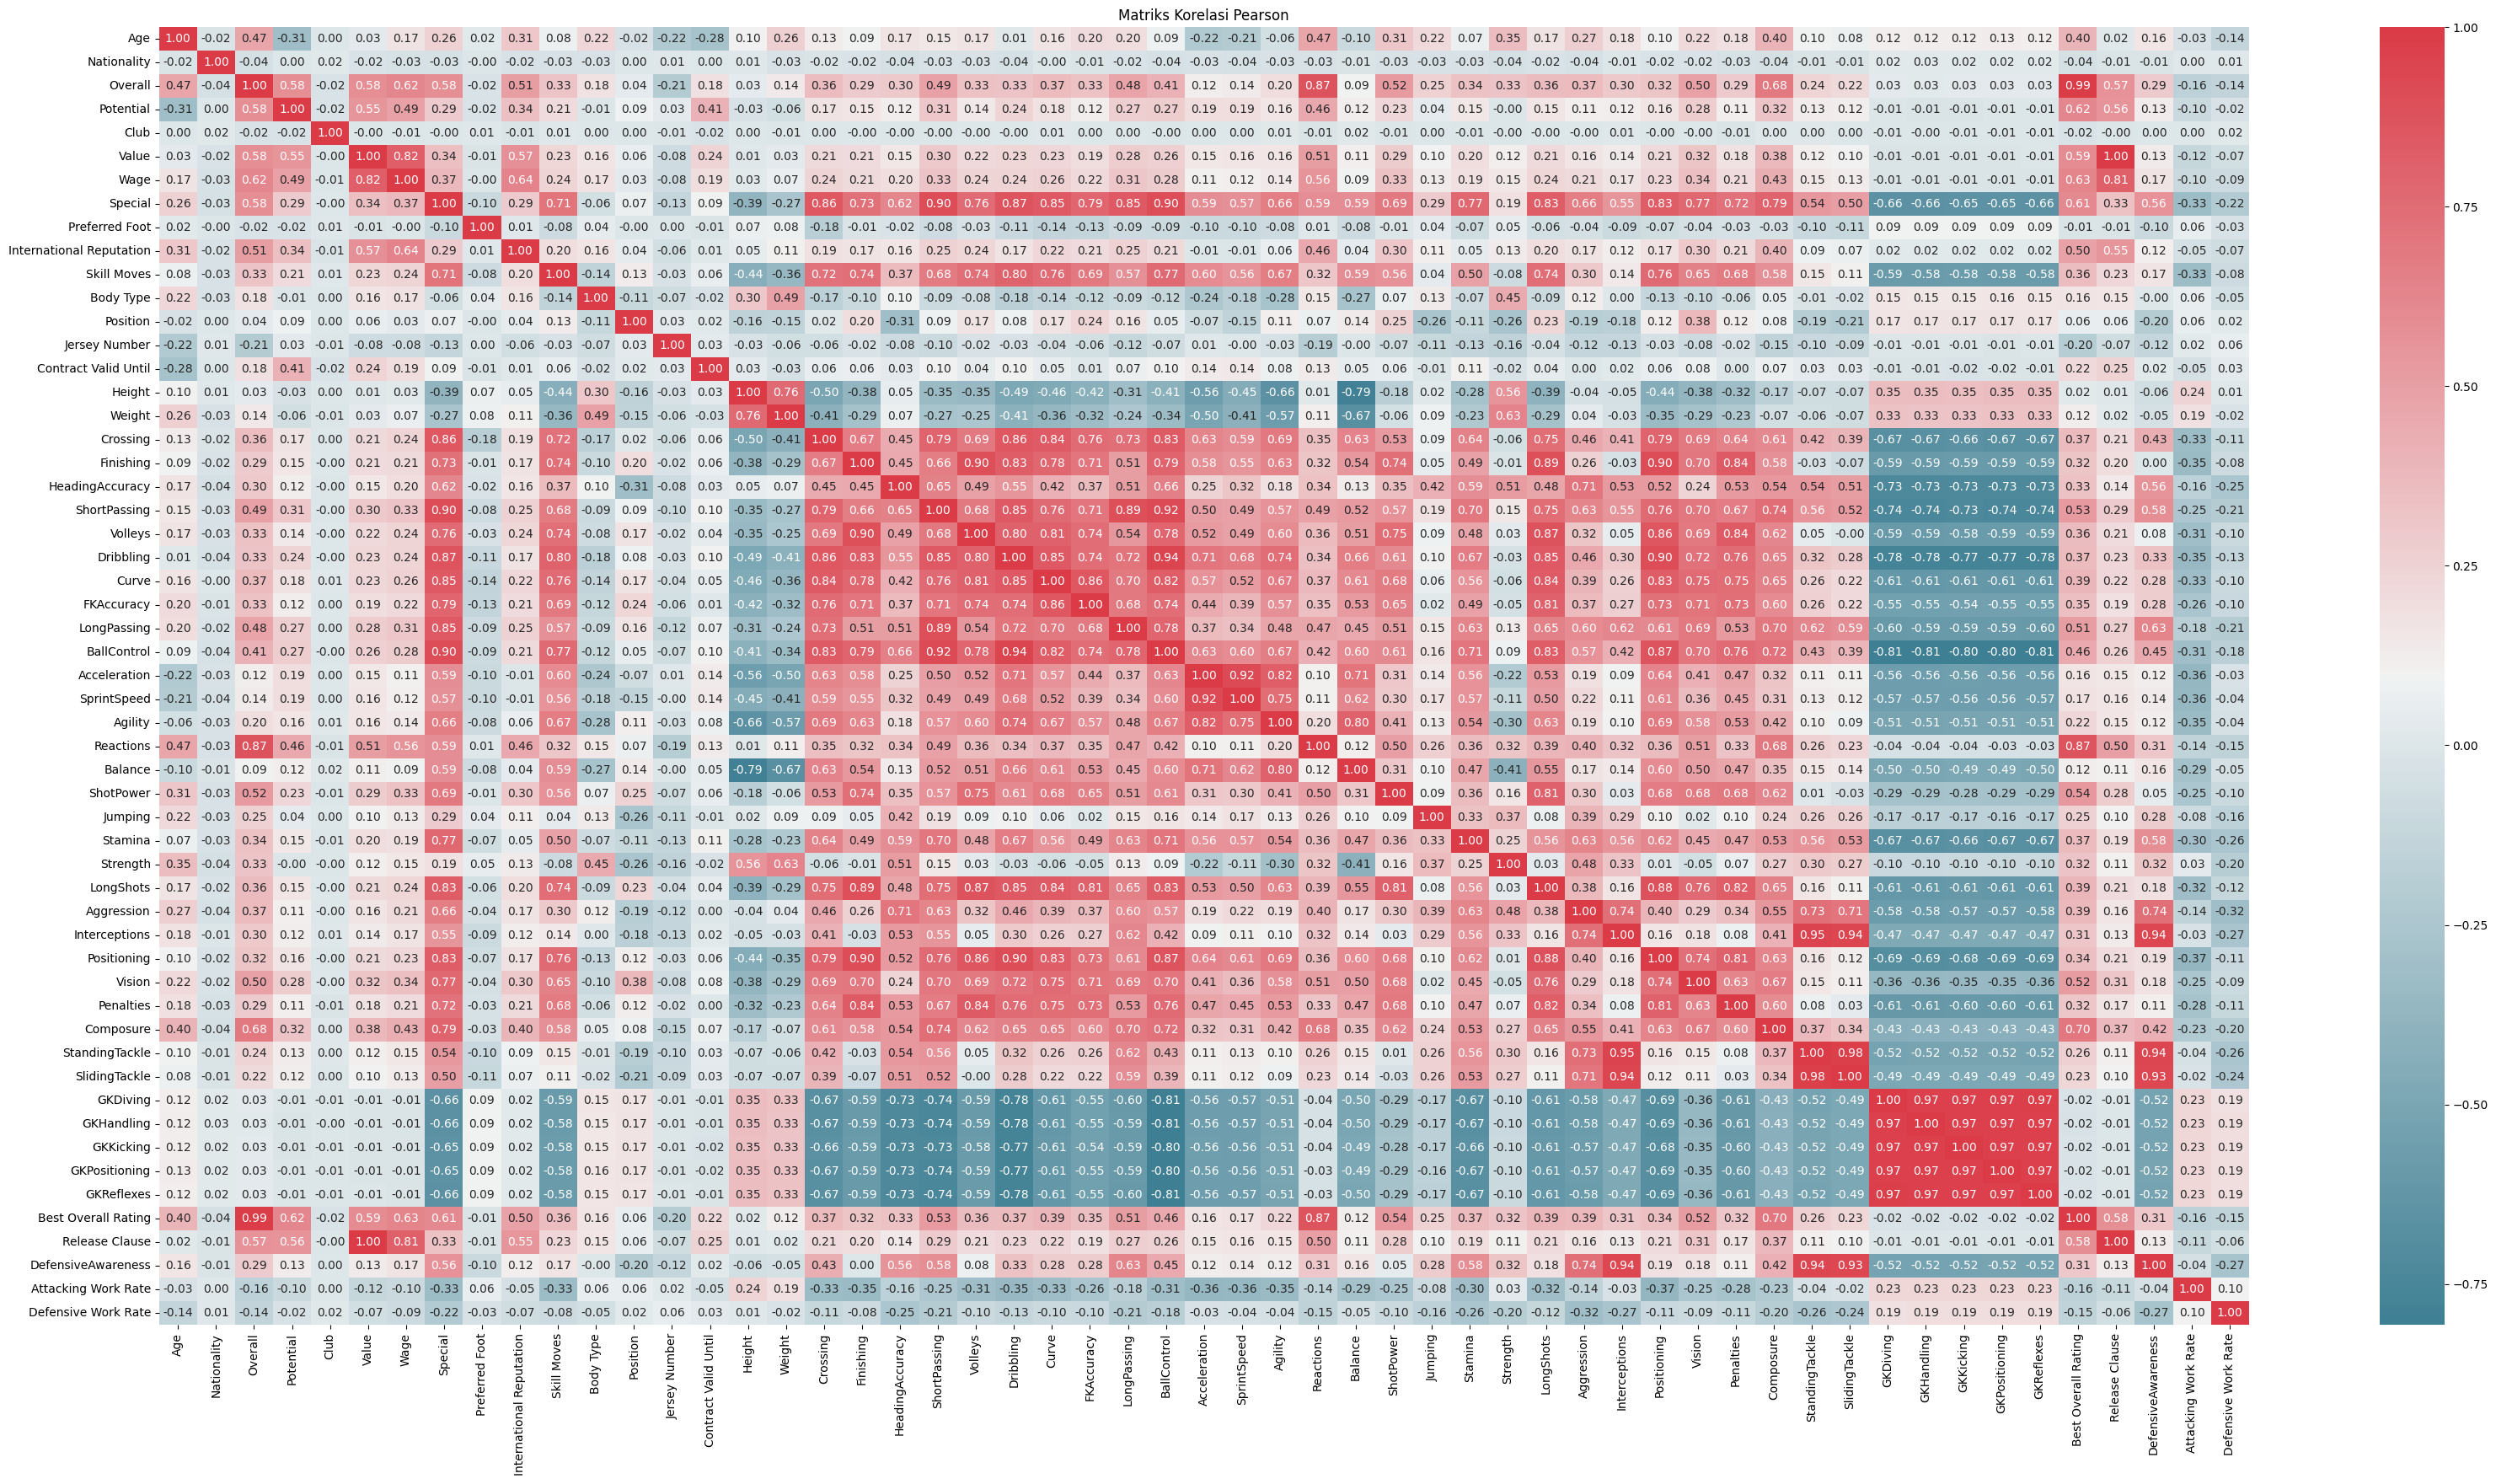

In [17]:
plt.figure(figsize=(40,20))

sns.heatmap(df_reg.corr(), vmin=None, vmax=None,
                cmap=sns.diverging_palette(220, 10, as_cmap=True), center=None,
                robust=False, annot=True,
                fmt='.2f', annot_kws=None,
                linewidths=0, linecolor='white',
                cbar_kws=None, cbar_ax=None, square=False,
                xticklabels='auto', yticklabels='auto',
                mask=None, ax=None)

plt.title("Matriks Korelasi Pearson")

In [18]:
X = df_reg.drop('Position', axis=1)
y = df_reg['Position']

In [19]:
X = X.drop(['Best Overall Rating', 'DefensiveAwareness', 'StandingTackle', 'Release Clause', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'BallControl', 'Interceptions'], axis=1)

In [20]:
max_param = ['Age', 'Potential', 'Special', 'Preferred Foot', 'Skill Moves', 'Body Type',
 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'Acceleration',
 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Positioning', 'Vision',
 'Penalties', 'Composure', 'SlidingTackle', 'GKReflexes',
 'Attacking Work Rate', 'Defensive Work Rate']

In [21]:
X = X[max_param]

## Training

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2023)

In [23]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mean_squared_error,
              metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
289/289 [==============================] - 1s 2ms/step - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.0905 - val_mean_squared_error: 0.0905
Epoch 2/100
289/289 [==============================] - 1s 2ms/step - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.0824 - val_mean_squared_error: 0.0824
Epoch 3/100
289/289 [==============================] - 0s 2ms/step - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 4/100
289/289 [==============================] - 0s 1ms/step - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 5/100
289/289 [==============================] - 0s 2ms/step - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0692 - val_mean_squared_error: 0.0692
Epoch 6/100
289/289 [==============================] - 0s 1ms/step - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0666 - val_mean_squared_error: 0.0666
Epoch 7/100
289/289 [=

## Evaluating

In [24]:
# Evaluate the model
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test mean squared error: {test_mse:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics on test predictions
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test,predictions)

print('MAE: ' + str(MAE))
print('MSE: ' + str(MSE))
print('RMSE: ' + str(RMSE))
print('R_squared: ' + str(R_squared))

91/91 [==============================] - 0s 939us/step - loss: 0.0558 - mean_squared_error: 0.0558
Test loss: 0.0558
Test mean squared error: 0.0558
91/91 [==============================] - 0s 796us/step
MAE: 0.1299312369544033
MSE: 0.05576218526728362
RMSE: 0.2361401813908078
R_squared: 0.6984115180720398
